In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [45]:
df = pd.read_csv('result.csv')
df

,data_group,event_type,finish_time,NCV,NCA,relative_NCV,relative_NCA,stroke_speed,velocity_mean,velocity_median,...,acceleration_y_kurtosis,jerk_y_mean,jerk_y_median,jerk_y_std_dev,jerk_y_minimum,jerk_y_maximum,jerk_y_data_range,jerk_y_iqr,jerk_y_skewness,jerk_y_kurtosis
0,1,3,5.330274,49,57,9.192774,10.693635,565.845321,2263.546556,649.652565,...,15.488737,2.471450e+07,6.998921e+06,5.903617e+07,0.0,4.119365e+08,4.119365e+08,1.199815e+07,4.047516,17.892987
1,1,4,9.090035,89,116,9.790942,12.761228,827.240121,2945.499294,888.884045,...,18.437567,2.959966e+07,8.499903e+06,5.896648e+07,0.0,4.929944e+08,4.929944e+08,1.724980e+07,3.994062,20.315032
2,1,1,10.520178,96,116,9.125321,11.026429,449.956104,1707.954222,497.675696,...,24.207903,2.122718e+07,4.499771e+06,6.038038e+07,0.0,4.999746e+08,4.999746e+08,1.199939e+07,5.154486,30.153477
3,1,4,8.659999,55,71,6.351040,8.198616,222.224360,1843.591676,461.577380,...,3.700015,1.208667e+07,6.000003e+06,1.681188e+07,0.0,8.600004e+07,8.600004e+07,1.075000e+07,2.300577,5.289407
4,1,3,3.750031,41,48,10.933243,12.799894,549.091998,2030.160400,682.289498,...,18.037439,1.986617e+07,5.999851e+06,4.145625e+07,0.0,3.099923e+08,3.099923e+08,1.299968e+07,4.428486,23.655919
5,1,4,7.070208,68,81,9.617821,11.456522,534.962405,1900.120006,635.022838,...,11.077116,2.198800e+07,5.999469e+06,4.783175e+07,0.0,3.069728e+08,3.069728e+08,1.199894e+07,3.702824,14.878467
6,1,2,5.399949,56,68,10.370469,12.592712,516.738727,1732.119756,596.822725,...,12.439957,1.626461e+07,6.000171e+06,3.272994e+07,0.0,2.260064e+08,2.260064e+08,9.500271e+06,3.731067,15.476854
7,1,4,9.740254,92,114,9.445339,11.704007,637.841630,2885.550704,890.225195,...,14.810522,2.994627e+07,9.999217e+06,5.322969e+07,0.0,4.569642e+08,4.569642e+08,2.699789e+07,3.906762,20.265840
8,1,3,8.860059,87,114,9.819348,12.866732,840.598479,3015.798081,781.212589,...,13.615636,3.028184e+07,6.999861e+06,6.154145e+07,0.0,4.869903e+08,4.869903e+08,1.799964e+07,3.765235,17.595776
9,1,4,8.840001,88,115,9.954750,13.009049,841.576886,3164.231928,948.683234,...,15.833512,3.284848e+07,1.050000e+07,5.986056e+07,0.0,5.039999e+08,5.039999e+08,2.425000e+07,3.736595,18.648755


# Con 3 clases

In [46]:
x_numpy = df[
    [
        "NCV",
        "NCA",
        "relative_NCV",
        "relative_NCA",
        "velocity_mean",
        "velocity_std_dev",
        "velocity_maximum",
        "velocity_data_range",
        "velocity_kurtosis",
        "acceleration_mean",
        "acceleration_skewness",
        "acceleration_kurtosis",
        "jerk_mean",
        "jerk_std_dev",
        "jerk_maximum",
        "jerk_data_range",
        "jerk_kurtosis",
        "velocity_x_mean",
        "velocity_x_maximum",
        "velocity_x_data_range",
        "velocity_x_skewness",
        "velocity_x_kurtosis",
        "acceleration_x_maximum",
        "jerk_x_maximum",
        "jerk_x_data_range",
        "jerk_x_skewness",
        "jerk_x_kurtosis",
        "velocity_y_mean",
        "acceleration_y_mean",
        "acceleration_y_median",
        "acceleration_y_std_dev",
        "jerk_y_mean",
        "jerk_y_std_dev",
        "jerk_y_skewness",
        "jerk_y_kurtosis",
    ]
]
y_numpy = df.loc[:, "data_group"]
# bajar a 0,1,2
y_numpy = y_numpy - 1
y = keras.utils.to_categorical(y_numpy, num_classes=3)

In [47]:
scaler = StandardScaler()
scaler.fit(x_numpy)
x_scaled = scaler.transform(x_numpy)
x_scaled.shape

(2680, 35)

In [48]:
print(y[:10])
X_train, X_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [49]:
model = Sequential()
model.add(Dense(160, activation="relu", input_dim=35))
model.add(Dropout(0.5))
model.add(Dense(80, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation="softmax"))
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [50]:
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [51]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(
    filepath="mnist.model.best.hdf5", verbose=1, save_best_only=True
)
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    validation_split=0.33,
    batch_size=128,
    callbacks=[checkpointer],
    verbose=1,
    shuffle=True,
)

Epoch 1/200
 1/12 [=>............................] - ETA: 3s - loss: 1.3084 - accuracy: 0.3516
Epoch 1: val_loss improved from inf to 1.01657, saving model to mnist.model.best.hdf5
12/12 [==============================] - 0s 17ms/step - loss: 1.2219 - accuracy: 0.3809 - val_loss: 1.0166 - val_accuracy: 0.5056
Epoch 2/200
 1/12 [=>............................] - ETA: 0s - loss: 1.1775 - accuracy: 0.3828
Epoch 2: val_loss improved from 1.01657 to 0.99395, saving model to mnist.model.best.hdf5
12/12 [==============================] - 0s 4ms/step - loss: 1.1160 - accuracy: 0.4499 - val_loss: 0.9939 - val_accuracy: 0.5141
Epoch 3/200
 1/12 [=>............................] - ETA: 0s - loss: 1.0622 - accuracy: 0.4922
Epoch 3: val_loss did not improve from 0.99395
12/12 [==============================] - 0s 3ms/step - loss: 1.0465 - accuracy: 0.4916 - val_loss: 0.9959 - val_accuracy: 0.5113
Epoch 4/200
 1/12 [=>............................] - ETA: 0s - loss: 0.9992 - accuracy: 0.4844
Epoch 4: 

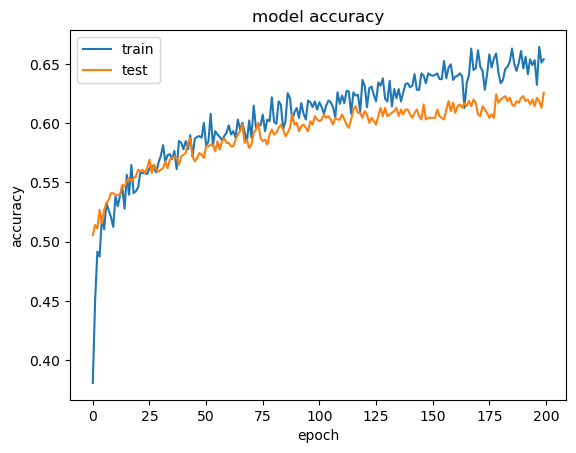

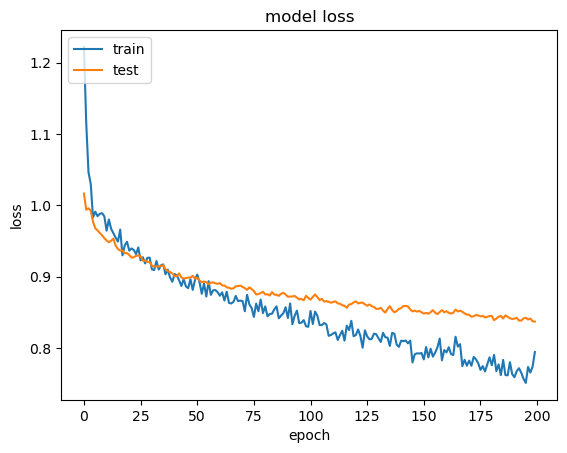

In [52]:
# summarize history for accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()
# summarize history for loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [53]:
model.load_weights("mnist.model.best.hdf5")

In [54]:
score = model.evaluate(X_test, y_test, batch_size=128)
score

5/5 [==============================] - 0s 3ms/step - loss: 0.8070 - accuracy: 0.6511


[0.8070339560508728, 0.6511194109916687]

In [55]:
accuracy = 100*score[1]
print('Precisión durante la prueba: %.4f%%' % accuracy)

Precisión durante la prueba: 65.1119%


# Con solo 2 clases

In [56]:
x_numpy = df[
    [
        "NCV",
        "NCA",
        "relative_NCV",
        "relative_NCA",
        "velocity_mean",
        "velocity_std_dev",
        "velocity_maximum",
        "velocity_data_range",
        "velocity_kurtosis",
        "acceleration_mean",
        "acceleration_skewness",
        "acceleration_kurtosis",
        "jerk_mean",
        "jerk_std_dev",
        "jerk_maximum",
        "jerk_data_range",
        "jerk_kurtosis",
        "velocity_x_mean",
        "velocity_x_maximum",
        "velocity_x_data_range",
        "velocity_x_skewness",
        "velocity_x_kurtosis",
        "acceleration_x_maximum",
        "jerk_x_maximum",
        "jerk_x_data_range",
        "jerk_x_skewness",
        "jerk_x_kurtosis",
        "velocity_y_mean",
        "acceleration_y_mean",
        "acceleration_y_median",
        "acceleration_y_std_dev",
        "jerk_y_mean",
        "jerk_y_std_dev",
        "jerk_y_skewness",
        "jerk_y_kurtosis",
    ]
]
y_numpy = df.loc[:, "data_group"]
# si es 1 que sea 0 y si es 2 o 3 que sea 1
function= lambda x: 0 if x == 1 else 1
y_numpy = y_numpy.apply(function)
y = keras.utils.to_categorical(y_numpy, num_classes=2)

In [57]:
scaler = StandardScaler()
scaler.fit(x_numpy)
x_scaled = scaler.transform(x_numpy)
x_scaled.shape

(2680, 35)

In [58]:
print(y[:10])
X_train, X_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [62]:
model = Sequential()
model.add(Dense(160, activation="relu", input_dim=35))
model.add(Dropout(0.5))
model.add(Dense(80, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [63]:
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [64]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(
    filepath="mnist.model.best.hdf5", verbose=1, save_best_only=True
)
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    validation_split=0.33,
    batch_size=128,
    callbacks=[checkpointer],
    verbose=1,
    shuffle=True,
)

Epoch 1/200
 1/12 [=>............................] - ETA: 2s - loss: 0.7405 - accuracy: 0.5703
Epoch 1: val_loss improved from inf to 0.65156, saving model to mnist.model.best.hdf5
12/12 [==============================] - 0s 13ms/step - loss: 0.7409 - accuracy: 0.5641 - val_loss: 0.6516 - val_accuracy: 0.6017
Epoch 2/200
 1/12 [=>............................] - ETA: 0s - loss: 0.7800 - accuracy: 0.5234
Epoch 2: val_loss improved from 0.65156 to 0.63721, saving model to mnist.model.best.hdf5
12/12 [==============================] - 0s 4ms/step - loss: 0.7012 - accuracy: 0.5850 - val_loss: 0.6372 - val_accuracy: 0.6201
Epoch 3/200
 1/12 [=>............................] - ETA: 0s - loss: 0.6817 - accuracy: 0.5781
Epoch 3: val_loss improved from 0.63721 to 0.63051, saving model to mnist.model.best.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.6663 - accuracy: 0.6142 - val_loss: 0.6305 - val_accuracy: 0.6412
Epoch 4/200
 1/12 [=>............................] - ETA: 0s 

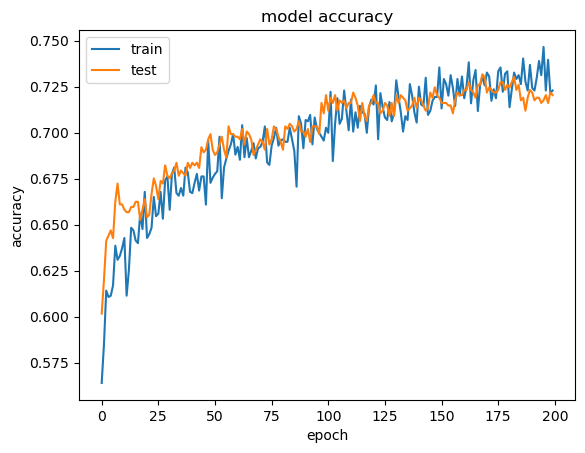

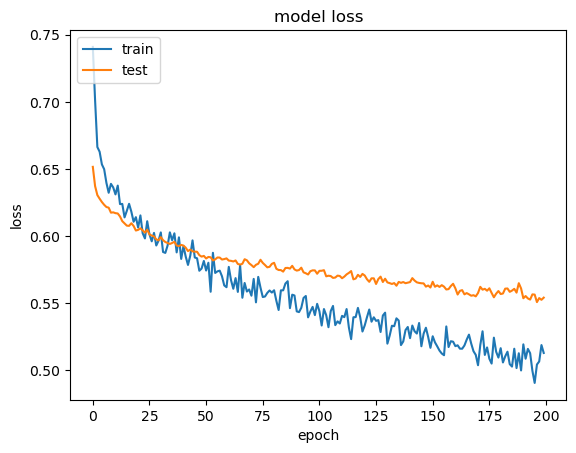

In [65]:
# summarize history for accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()
# summarize history for loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [66]:
model.load_weights("mnist.model.best.hdf5")

In [67]:
score = model.evaluate(X_test, y_test, batch_size=128)
score

5/5 [==============================] - 0s 1ms/step - loss: 0.5171 - accuracy: 0.7295


[0.5170900225639343, 0.72947758436203]

In [68]:
accuracy = 100 * score[1]
print("Precisión durante la prueba: %.4f%%" % accuracy)

Precisión durante la prueba: 72.9478%
